I decided to look at the number of people that have wages or salaries as one of the factors to determine the "Best neighborhood". This is an important factor because in order to have the best neighborhood, people in the neighborhood should be able to obtain their basic needs for living, and a salary is money that people can use to buy their needs. 

In [49]:
#import panda
import pandas as pd
import numpy as np
%matplotlib inline

#open the salary data file
salary = pd.read_csv("salary.csv")
#show the first 10 datas
salary.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
1,Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
2,Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
3,Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
4,Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000
5,Banksville,6,1946.0,229.222599,1564.0,216.584856,382.0,134.988888
6,Bedford Dwellings,7,723.0,53.000000,348.0,71.000000,375.0,75.000000
7,Beechview,8,3567.0,258.027130,2719.0,255.476026,848.0,149.207909
8,Beltzhoover,9,848.0,156.057682,556.0,128.152253,292.0,111.332834
9,Bloomfield,10,4571.0,205.494525,3724.0,206.458228,847.0,126.960624


In [54]:
#shows only the neighborhood name and the total number of people
salary = salary.iloc[0:, 0:3]
#show the neighborhood with the larget number of people with salary
salary.nlargest(10, 'Estimate; Total:',keep='first')

,Neighborhood,Id,Estimate; Total:
68,Shadyside,69,7484.0
77,Squirrel Hill South,78,7211.0
13,Brookline,14,5843.0
9,Bloomfield,10,4571.0
53,Mount Washington,54,4385.0
15,Carrick,16,4301.0
7,Beechview,8,3567.0
36,Greenfield,37,3438.0
76,Squirrel Hill North,77,3370.0
72,South Side Flats,73,3311.0


## Visualization

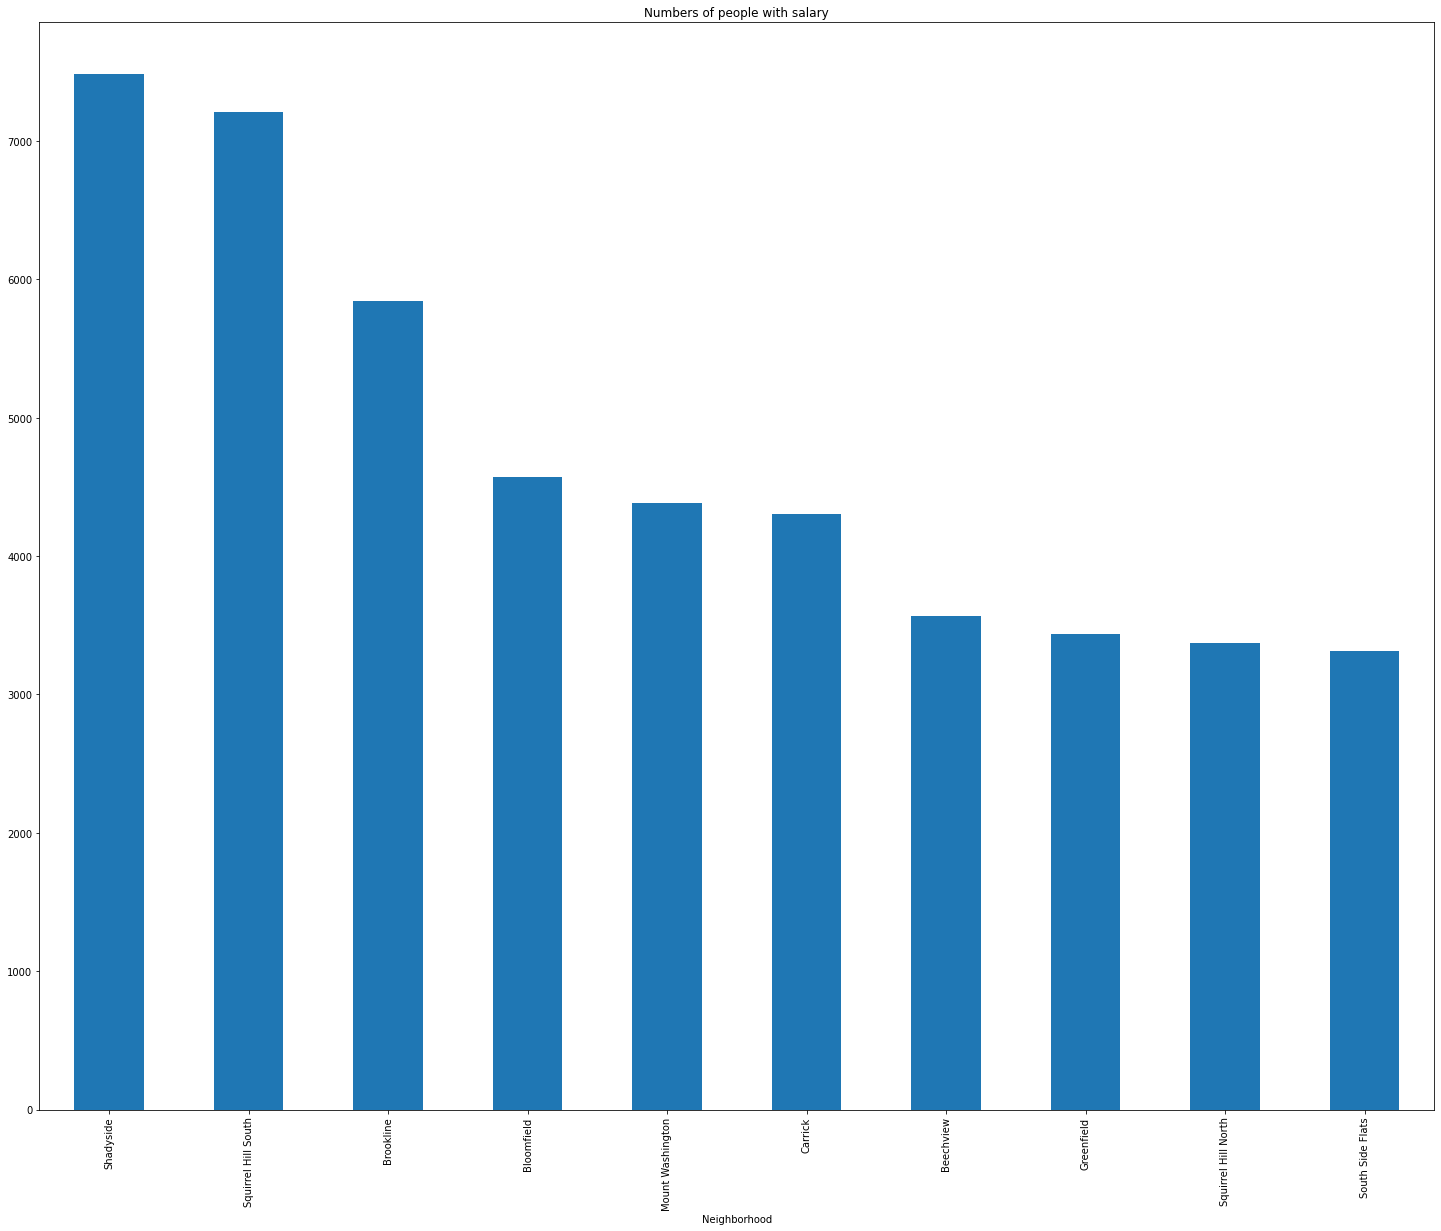

In [55]:
# show only the top 10 neighborhood
salary1 = salary.nlargest(10, 'Estimate; Total:',keep='first')
# make the index to neighborhood names
salary1 = salary1.set_index('Neighborhood')
# create a bar visualization
salary1['Estimate; Total:'].plot(kind="bar", title=("Numbers of people with salary"), figsize=(25,20))

## Top neighborhoods for numbers of people with salaries
As you can see the top 10 neighborhoods of people with a salary are Shadyside, Squirrel Hill South, Brookline, Bloomfield, Mount Washington, Carrick, Beechview, Greenfield, Squirrel Hill North, and South Side Falts.

But since the total population of each neighborhood is different, we should look at the percentage of each person with salary in the neighborhood for a more accurate list.

In [56]:
#open the total-population data file
population = pd.read_csv("total-population.csv")
#show the first 10 datas
population.head(10)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


In [57]:
#shows only the neighborhood name and the total number of people
population = population.iloc[0:, 0:3]
#show the neighborhood with largest population
population.nlargest(10, 'Estimate; Total',keep='first')

,Neighborhood,Id,Estimate; Total
77,Squirrel Hill South,78,16042.0
68,Shadyside,69,13562.0
13,Brookline,14,13160.0
76,Squirrel Hill North,77,11336.0
15,Carrick,16,10122.0
56,North Oakland,57,9602.0
53,Mount Washington,54,8743.0
9,Bloomfield,10,8669.0
7,Beechview,8,8078.0
36,Greenfield,37,7690.0


## Visualization

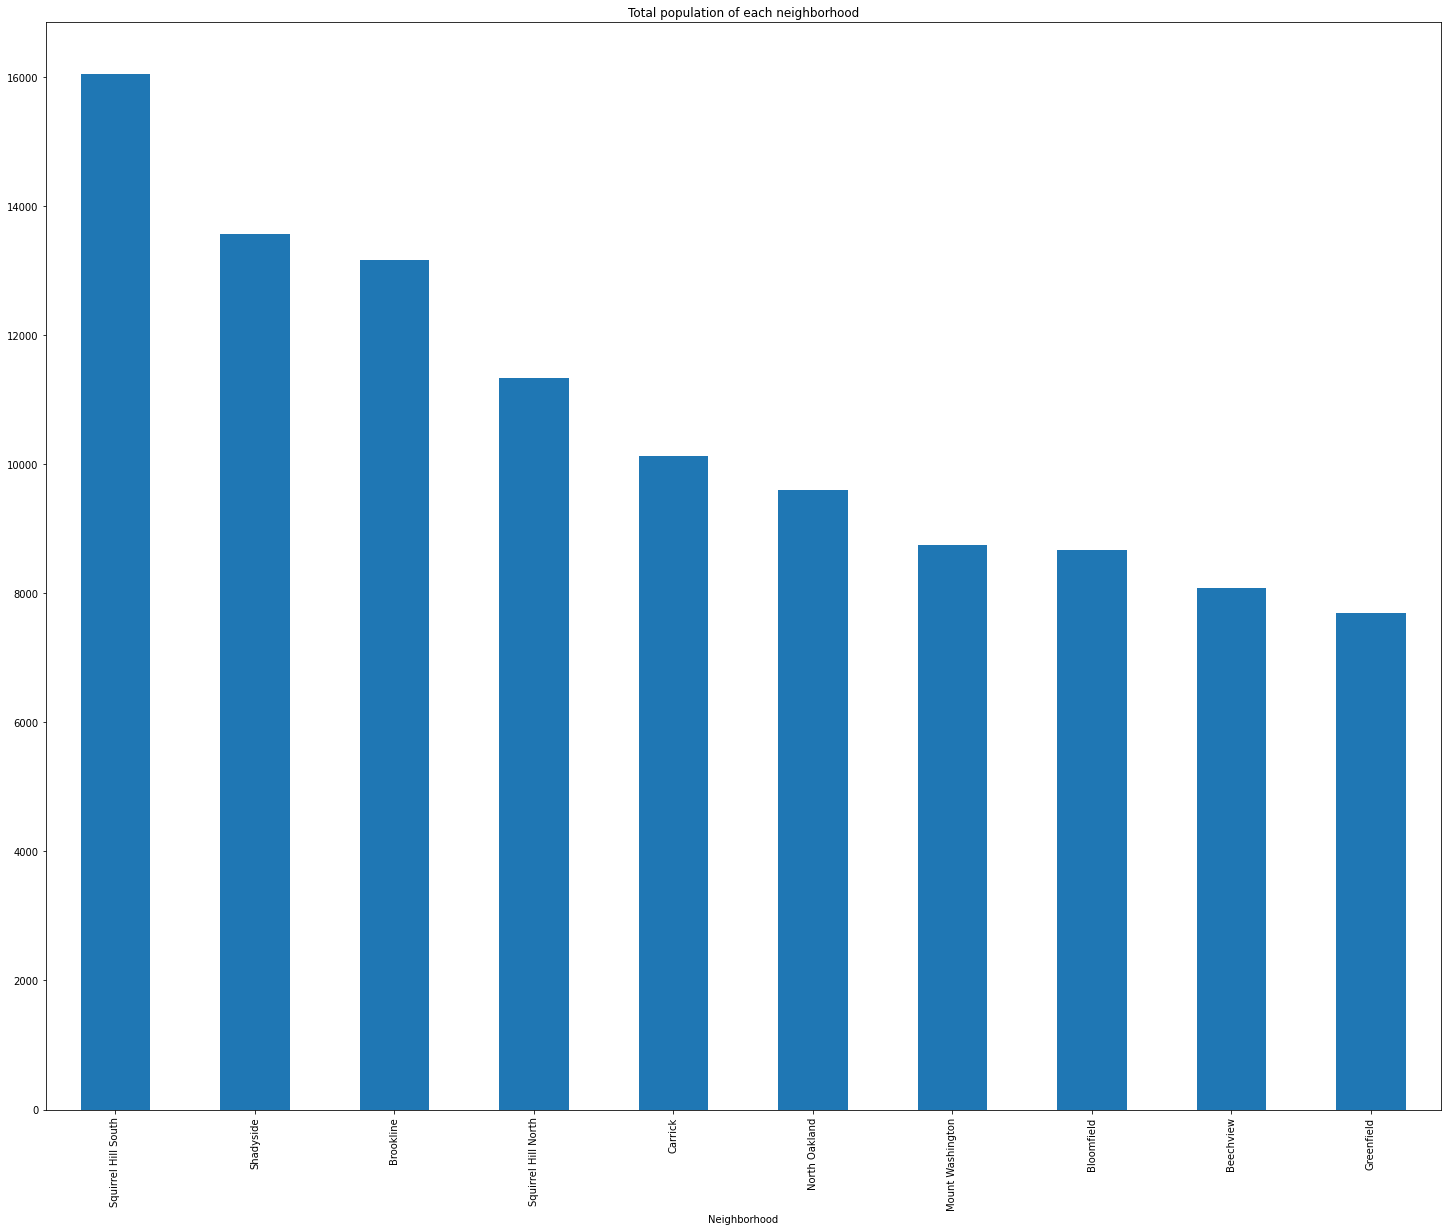

In [58]:
#shows only the top 10 neighborhood
population1 = population.nlargest(10, 'Estimate; Total',keep='first')
# make the index to neighborhood names
population1 = population1.set_index('Neighborhood')
# create a bar visualization
population1['Estimate; Total'].plot(kind="bar", title=("Total population of each neighborhood"), figsize=(25,20))

## Top neighborhoods with the largest population
As you can see the top 10 neighborhoods with the largest population are Squirrel Hill South, Shadyside, Brookline, Squirrel Hill North, Carrick, North Oakland, Mount Washington, Bloomfield, Beechview, and Greenfield. 

Now that we have both the neighborhood with numbers of people with salary data and the top 10 neighborhood with the largest population data, we can calculate the percentage of each person in the neighborhood with salary.

In [66]:
#calculate the percentage of each person with salary in the neighborhood
#create a new dataframe to store needed datas
percentage = pd.DataFrame()
#use the data from the salary data file and the data from the total population file
#create new columns
percentage["Neighborhood"] = population["Neighborhood"]
percentage['Number of people with salary']= salary['Estimate; Total:']
percentage['Total population']= population['Estimate; Total']

#calculate the percentage by dividing the total population by the number of people with salary 
percentage['Percent']= percentage['Number of people with salary']/percentage['Total population']
#show the neighborhood with the larget percent of each person with salary
percentage.nlargest(10, 'Percent',keep='first')

,Neighborhood,Number of people with salary,Total population,Percent
21,Chateau,3.0,3.0,1.000000
57,North Shore,154.0,205.0,0.751220
80,Strip District,520.0,747.0,0.696118
71,South Shore,8.0,12.0,0.666667
25,East Allegheny,1302.0,2095.0,0.621480
0,Allegheny Center,870.0,1411.0,0.616584
33,Friendship,1074.0,1840.0,0.583696
64,Point Breeze North,996.0,1732.0,0.575058
68,Shadyside,7484.0,13562.0,0.551836
6,Bedford Dwellings,723.0,1349.0,0.535953


## Visualization

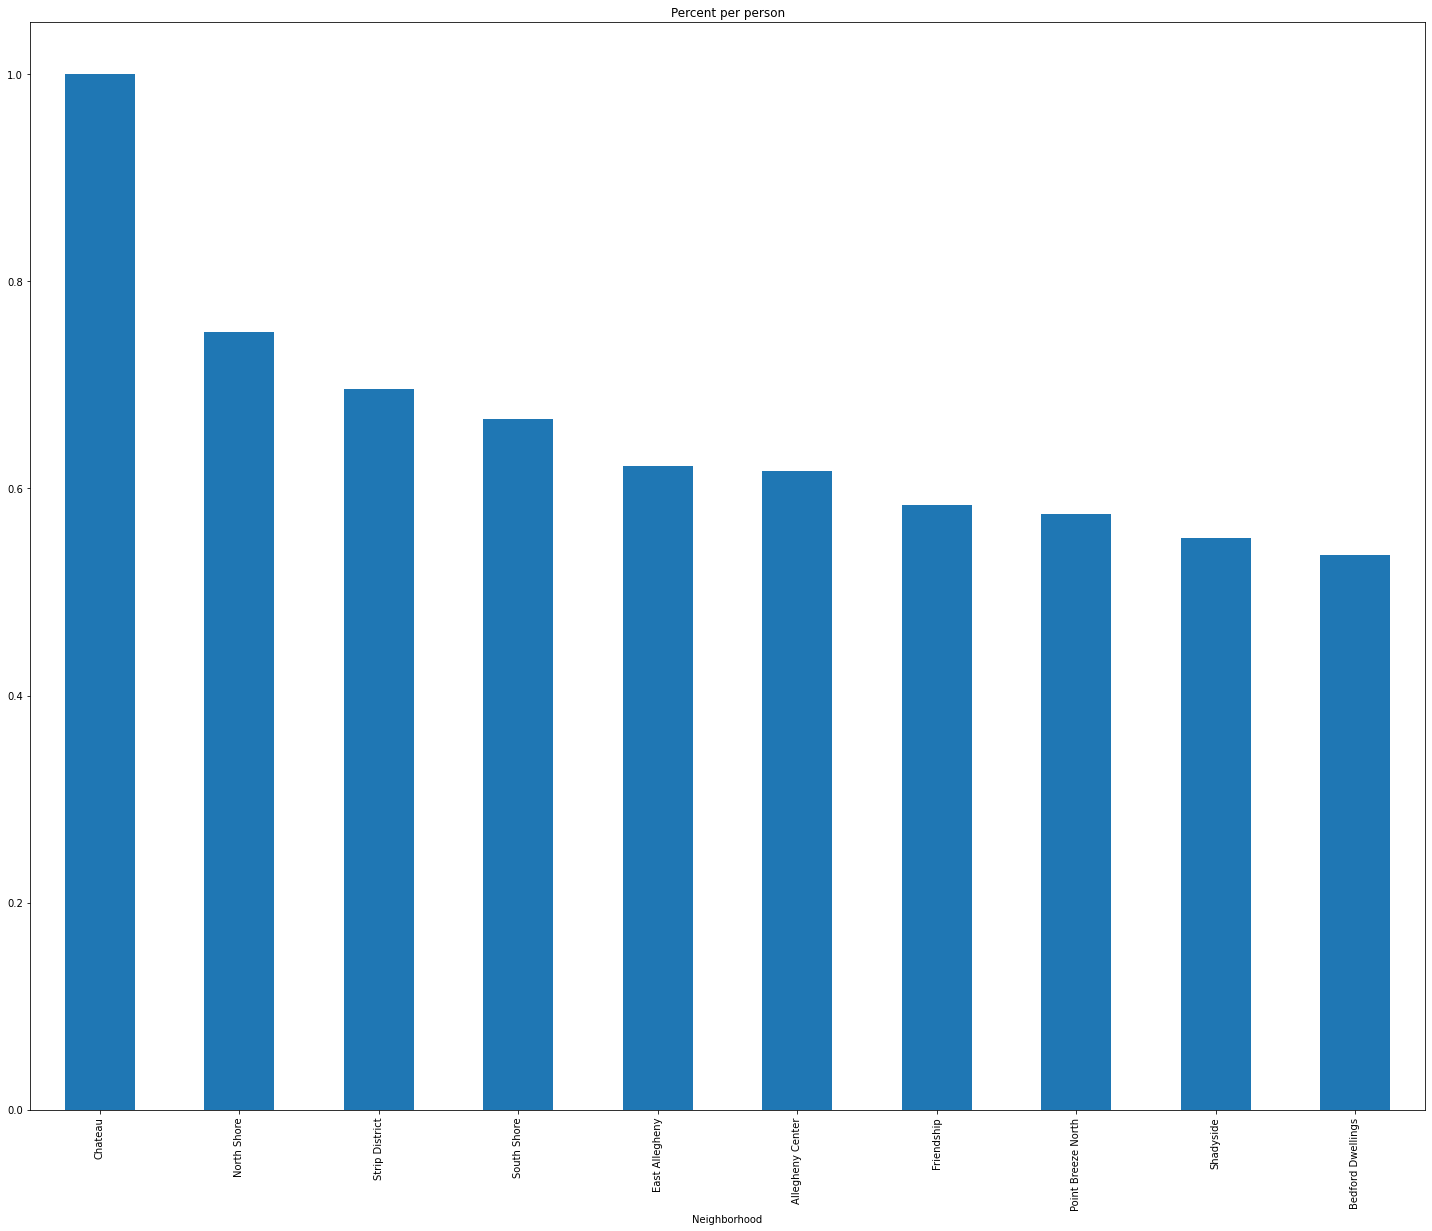

In [68]:
#shows only the top 10 neighborhood
percentage1 = percentage1.nlargest(10, 'Percent',keep='first')
# make the index to neighborhood names
percentage1 = percentage1.set_index('Neighborhood')
# create a bar visualization
percentage1["Percent"].plot(kind="bar", title=("Percent per person"), figsize=(25,20))

## Top neighborhoods with the largest percentage 
As you can see the top 10 neighborhoods with the highest percent of person with salary are Chateau, North Shore, Strip District, South Shore, East Alleghney, Allegheny Center, Friendship, Point Breeze North, Shadyside, and Bedford Dwellings.

## Conclusion
The best neighborhood will be Chateau, since the result shows that 100% of the people living in Chateau have a job that provides a salary for them to meet their basic needs.